In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


# 1. Veri Seti Seçimi ve Yükleme

In [41]:
import pandas as pd
import numpy as np
import random

# Eksik değerler eklemek için fonksiyon
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.
    """
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing


In [42]:
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1')


In [43]:
try:
    print(df.head())
except NameError:
    print("Veri çerçevesi 'df' tanımlanmamış.")


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [44]:
# Veri setinin ilk 5 satırına göz atalım
print(df.head()) # İlk 5 satır

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


 # 2. Keşifsel Veri Analizi (EDA)
Veri setini inceledikten sonra, verinin yapısını anlamak için bazı temel keşifsel veri analizi (EDA) adımlarını atacağız. Bu adımlar, veri setindeki önemli bilgileri keşfetmek için gereklidir.
* **2.1. Veri Yapısının İncelenmesi**

In [45]:
# Veri setinin genel yapısını kontrol edelim
print(df.info())  # Veri türleri ve eksik değerler hakkında bilgi verir


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [46]:
# Veri setinin boyutunu kontrol edelim
print(f"Veri seti boyutu: {df.shape}")  # (satır, sütun)

Veri seti boyutu: (541909, 8)


In [47]:
# Veri setinin istatistiksel özetine göz atalım
print(df.describe())  # Sayısal sütunların temel istatistiklerini döndürür

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


* **2.2. Eksik Verileri Kontrol Etme**
> Eksik veri, modellemeye başlamadan önce temizlenmesi gereken önemli bir konudur.**

In [48]:
# Eksik veri oranlarını kontrol edelim
missing_data = df.isnull().sum()
print(f"Eksik veri sayıları:\n{missing_data}")

Eksik veri sayıları:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [49]:

# Eksik veri oranını yüzdelik olarak görmek için
missing_percentage = (missing_data / len(df)) * 100
print(f"Eksik veri yüzdesi:\n{missing_percentage}")

Eksik veri yüzdesi:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


# 2. Eksik Verilerin Düzgün Bir Şekilde Düzeltilmesi
Eksik veriler, modelin doğruluğunu etkileyebilir. Eksik verileri düzeltmek için birkaç yöntem kullanabilirsiniz. Bunlar arasında, eksik verileri ortalama, medyan, mod ile doldurmak veya satırları tamamen çıkarmak yer alır.

**1. Eksik Verileri Doldurmak**

> Sayısal Veriler için: Sayısal sütunlardaki eksik verileri genellikle ortalama (mean) veya medyan (median) ile doldurmak yaygın bir yöntemdir.

In [50]:


# Sayısal eksik veri doldurma
df['CustomerID'] = df['CustomerID'].fillna(df['CustomerID'].median())


>  Kategorik Veriler için: Kategorik verilerde eksik veriler için en yaygın değer (mode) ile doldurmak daha uygundur.

In [51]:
# Kategorik eksik veri doldurma
df['Description'] = df['Description'].fillna("Eksik")


# 3. Veri Tiplerini Düzenlemek
Veri setinde yanlış veri türlerine sahip sütunlar olabilir. Örneğin, sayısal veriler sayısal türde değilse, bu tür dönüşümleri yapmak önemlidir.

1. ** Adım 1: Veri Tiplerini Düzeltmek**

In [52]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Tarih formatına çevirme



**Adım 2: Kategorik Verileri Dönüştürmek**

Kategorik veriler, bazı durumlarda sayısal verilere dönüştürülmelidir (özellikle makine öğrenimi için).

In [53]:
df['Country'] = df['Country'].astype('category')  # Kategorik sütuna dönüştürme
df['Country'] = df['Country'].cat.codes  # Sayısal değerlerle değiştirme



# 4. Aykırı Değerlerin Tespiti ve Düzeltme
Aykırı değerler (outliers), veriyi bozabilir ve modelin performansını olumsuz etkileyebilir. Bu nedenle, aykırı değerlerin tespiti ve düzeltilmesi gereklidir.

Adım 1: Aykırı Değerleri Görselleştirmek
Aykırı değerlerin görsel olarak tespit edilmesi için kutu grafiği (boxplot) kullanabiliriz.

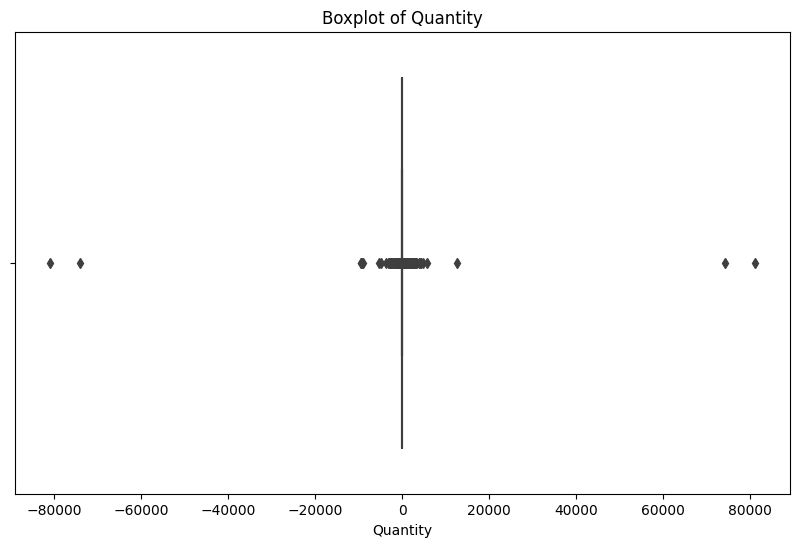

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kutu grafiği ile aykırı değerleri inceleme
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()



**Adım 2: Aykırı Değerleri Çıkarmak veya Düzeltmek**

Aykırı değerleri çıkarmak için belirli bir eşik değeri belirleyebiliriz. Örneğin, bir sütunun 1.5 katı IQR (interquartile range) dışında kalan değerleri aykırı olarak kabul edebiliriz.

> IQR ile Aykırı Değerlerin Tespiti ve Sayısını Görme

In [55]:
# IQR (Interquartile Range) ile aykırı değerleri tespit etme ve kaldırma
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değer eşikleri
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerlerin çıkarılması
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]
print(f"\nAykırı değerlerin kaldırılmasından sonra veri seti boyutu: {df.shape}")
# Temizlenmiş veri setinin ilk 5 satırını görüntüleme
print("\nTemizlenmiş veri setinin ilk 5 satırı:")
print(df.head())


Aykırı değerlerin kaldırılmasından sonra veri seti boyutu: (483290, 8)

Temizlenmiş veri setinin ilk 5 satırı:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID  Country  
0 2010-12-01 08:26:00       2.55     17850.0       36  
1 2010-12-01 08:26:00       3.39     17850.0       36  
2 2010-12-01 08:26:00       2.75     17850.0       36  
3 2010-12-01 08:26:00       3.39     17850.0       36  
4 2010-12-01 08:26:00       3.39     17850.0       36  


**2. Veri Çerçevesi Sonrası Kontrol**

Sonuç olarak, veri çerçevesinin son halini kontrol etmek için:

In [56]:
# Sonuçları görmek için ilk birkaç satırı yazdırın
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID  Country  
0 2010-12-01 08:26:00       2.55     17850.0       36  
1 2010-12-01 08:26:00       3.39     17850.0       36  
2 2010-12-01 08:26:00       2.75     17850.0       36  
3 2010-12-01 08:26:00       3.39     17850.0       36  
4 2010-12-01 08:26:00       3.39     17850.0       36  


**3. Eksik Veriler**

In [57]:
# Eksik veriler varsa kontrol edin
print(df.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# İstatistiksel Analizler
İlk olarak, verinizin temel istatistiksel ölçümlerini inceleyerek, dağılımı ve genel özellikleri anlamanızı sağlar.

**Temel İstatistiksel Ölçümler:**
* Ortalama (Mean): Verinin genel merkezi.
* Medyan (Median): Verinin ortasında yer alan değer, uç değerlere daha az duyarlıdır.
* Mod (Mode): En sık görülen değer.
* Standart Sapma (Standard Deviation): Verinin yayılımı ve ne kadar değişken olduğu.
* Çeyrekler arası mesafe (Interquartile Range - IQR): Verinin ilk çeyrek (Q1) ve üçüncü çeyrek (Q3) arasındaki mesafe, aşırı uç değerlerin tespitinde kullanılır.

In [58]:
# Temel istatistiksel ölçümleri hesaplama
statistics = df.describe()

# Standart sapma, mod ve medyan hesaplama
std_dev = df['Quantity'].std()
median = df['Quantity'].median()
mode = df['Quantity'].mode()[0]

print(f"Standart Sapma: {std_dev}")
print(f"Medyan: {median}")
print(f"Mod: {mode}")
print(statistics)


Standart Sapma: 4.54603696860281
Medyan: 3.0
Mod: 1
            Quantity                    InvoiceDate      UnitPrice  \
count  483290.000000                         483290  483290.000000   
mean        4.574599  2011-07-04 05:50:09.223033600       5.013476   
min       -12.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-25 12:57:00       1.250000   
50%         3.000000            2011-07-19 10:51:00       2.460000   
75%         6.000000            2011-10-19 16:05:00       4.150000   
max        23.000000            2011-12-09 12:50:00   38970.000000   
std         4.546037                            NaN     102.447232   

          CustomerID        Country  
count  483290.000000  483290.000000  
mean    15279.448364      34.472371  
min     12347.000000       0.000000  
25%     14487.000000      36.000000  
50%     15152.000000      36.000000  
75%     16241.000000      36.000000  
max     18287.000000      37.000000  
std      1458

# **Veri Dağılımını Görselleştirme**
Verinizin genel dağılımını anlamak için çeşitli görselleştirmeler kullanabilirsiniz. Bu adımda matplotlib ve seaborn kütüphaneleri oldukça faydalıdır.

**1. Histogram:**
> Bir değişkenin dağılımını incelemek için histogram kullanabiliriz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


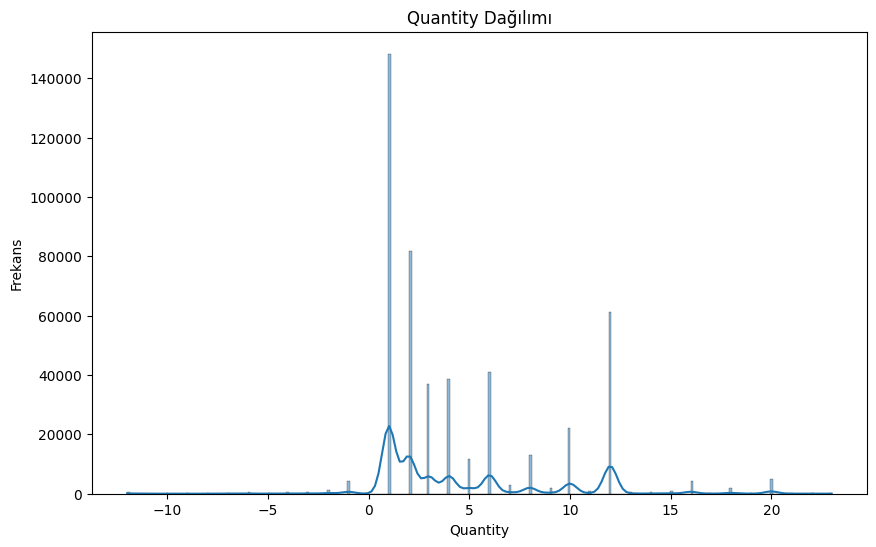

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quantity dağılımını görmek için histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Quantity'], kde=True)
plt.title('Quantity Dağılımı')
plt.xlabel('Quantity')
plt.ylabel('Frekans')
plt.show()



**# Kutu Grafiği (Box Plot):**
> Verinizin dağılımını ve aykırı değerleri görselleştirmek için kutu grafiği kullanabiliriz.

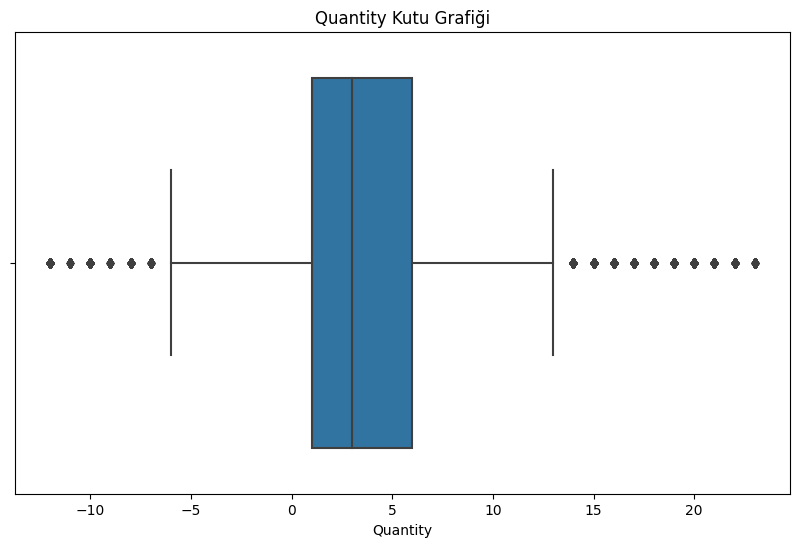

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Quantity'])
plt.title('Quantity Kutu Grafiği')
plt.show()


**Scatter Plot:**
> Değişkenler arasındaki ilişkiyi incelemek için scatter plot kullanabiliriz. Örneğin, Quantity ile UnitPrice arasındaki ilişkiyi inceleyebiliriz.

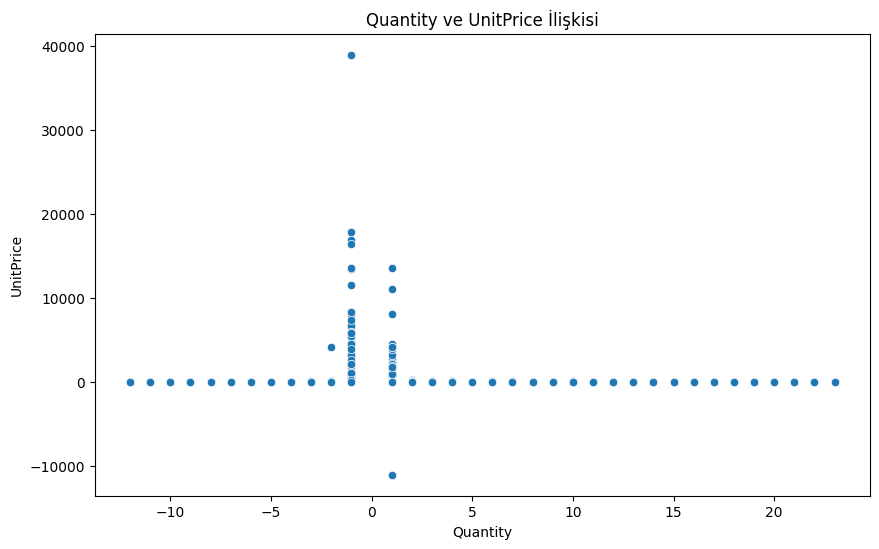

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Quantity'], y=df['UnitPrice'])
plt.title('Quantity ve UnitPrice İlişkisi')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()


# 3. Korelasyon Analizi
Değişkenler arasındaki ilişkileri incelemek için korelasyon matrisini görselleştirebilirsiniz. Korelasyon, değişkenler arasındaki doğrusal ilişkiyi ölçer.

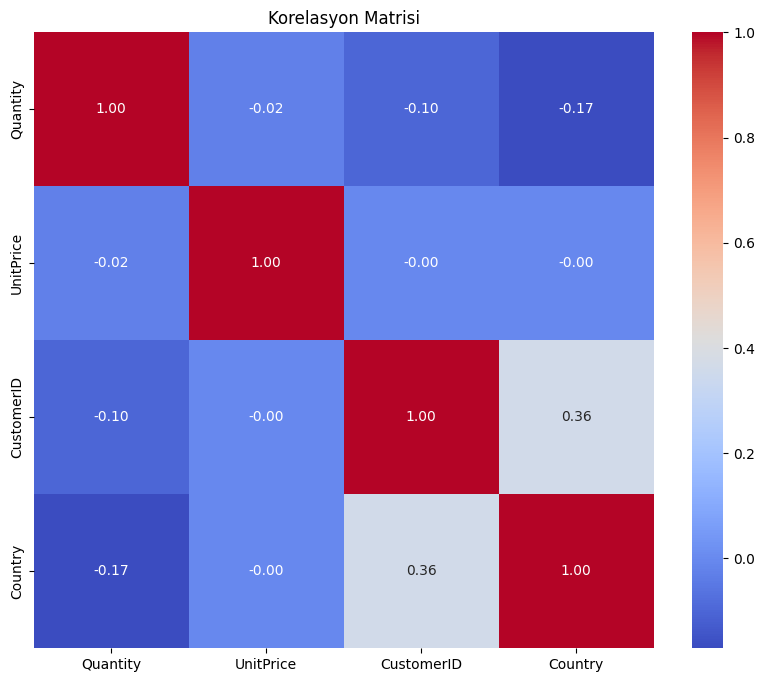

In [62]:
# Korelasyon Matrisi

numeric_df = df.select_dtypes(include=['number'])  # Sadece sayısal sütunlar
correlation_matrix = numeric_df.corr()

# Heatmap ile Korelasyon Matrisi Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()




# 4. Feature Selection & Feature Engineering
Veri setinizi daha iyi modellemek için önemli özellikleri seçebilir ve gerekirse yeni özellikler oluşturabilirsiniz.

**Feature Selection (Özellik Seçimi):**
Özelliklerin model üzerindeki etkisini analiz ederek, gereksiz bilgileri çıkarabilirsiniz.

In [64]:
# Yüksek korelasyonlu özellikleri kaldırma
threshold = 0.9

# Sadece sayısal sütunlar ile korelasyon matrisi oluşturma
numeric_df = df.select_dtypes(include=['number'])  # Sayısal sütunlar seçiliyor
corr_matrix = numeric_df.corr()

# Korelasyonu yüksek olan sütunları seçme
high_corr_var = [
    column for column in corr_matrix.columns if any(corr_matrix[column] > threshold) and column != corr_matrix.columns[0]
]
print("Yüksek Korelasyonlu Özellikler:", high_corr_var)

# Yüksek korelasyonlu sütunları çıkarma
df_reduced = df.drop(columns=high_corr_var, errors='ignore')  # Hataları yoksayarak çıkar
print("Azaltılmış Veri Çerçevesi:")
print(df_reduced.head())


Yüksek Korelasyonlu Özellikler: ['UnitPrice', 'CustomerID', 'Country']
Azaltılmış Veri Çerçevesi:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  
0 2010-12-01 08:26:00  
1 2010-12-01 08:26:00  
2 2010-12-01 08:26:00  
3 2010-12-01 08:26:00  
4 2010-12-01 08:26:00  


**Feature Engineering (Özellik Mühendisliği):**

Yeni özellikler oluşturmak, modelin performansını artırabilir. Örneğin, InvoiceDate sütununu bir zaman özelliğine dönüştürebilirsiniz.

In [66]:
df_reduced['Year'] = pd.to_datetime(df_reduced['InvoiceDate']).dt.year
df_reduced['Month'] = pd.to_datetime(df_reduced['InvoiceDate']).dt.month
df_reduced['Day'] = pd.to_datetime(df_reduced['InvoiceDate']).dt.day
df_reduced['Hour'] = pd.to_datetime(df_reduced['InvoiceDate']).dt.hour


**Yeni Oluşturulan Özelliklerin İncelenmesi**

Öncelikle, yeni eklediğiniz Year, Month, Day ve Hour sütunlarının veri çerçevesine doğru şekilde eklendiğini kontrol edelim:

In [68]:
print(df_reduced[['InvoiceDate', 'Year', 'Month', 'Day', 'Hour']].head())


          InvoiceDate  Year  Month  Day  Hour
0 2010-12-01 08:26:00  2010     12    1     8
1 2010-12-01 08:26:00  2010     12    1     8
2 2010-12-01 08:26:00  2010     12    1     8
3 2010-12-01 08:26:00  2010     12    1     8
4 2010-12-01 08:26:00  2010     12    1     8


**Yıl Bazında Satış Dağılımını Görselleştirme**

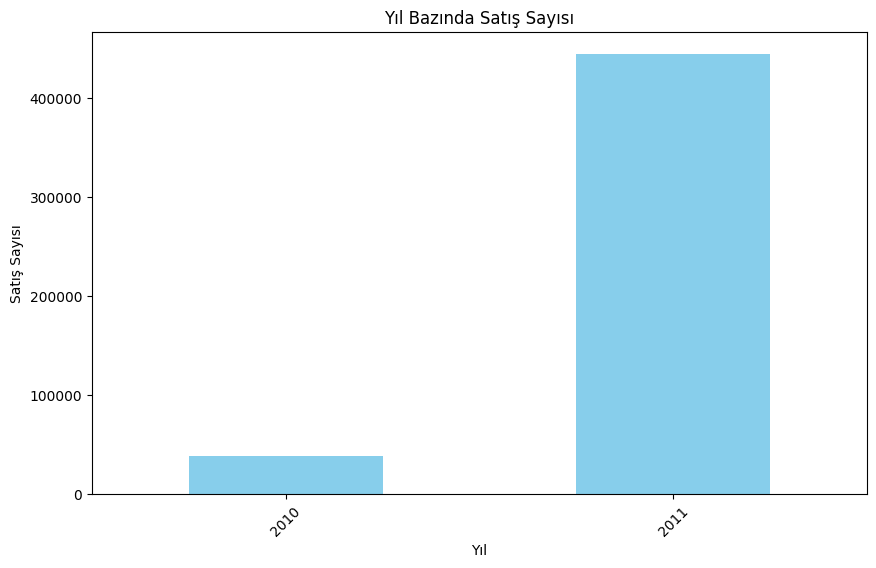

In [69]:
# Yıl bazında satış sayısının görselleştirilmesi
plt.figure(figsize=(10, 6))
df_reduced.groupby('Year').size().plot(kind='bar', color='skyblue')
plt.title('Yıl Bazında Satış Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45)
plt.show()


**Ay Bazında Satış Dağılımını Görselleştirme**

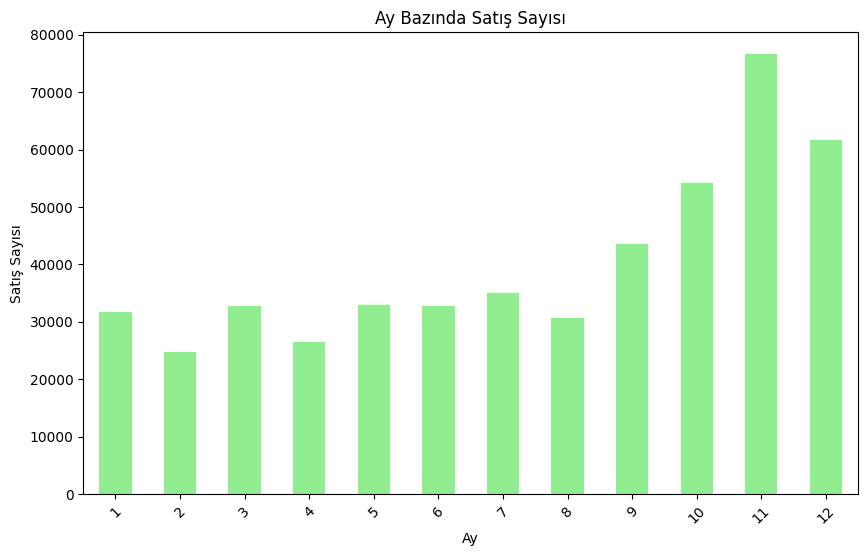

In [70]:
# Ay bazında satış sayısının görselleştirilmesi
plt.figure(figsize=(10, 6))
df_reduced.groupby('Month').size().plot(kind='bar', color='lightgreen')
plt.title('Ay Bazında Satış Sayısı')
plt.xlabel('Ay')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45)
plt.show()


** Gün Bazında Satış Dağılımını İnceleme**

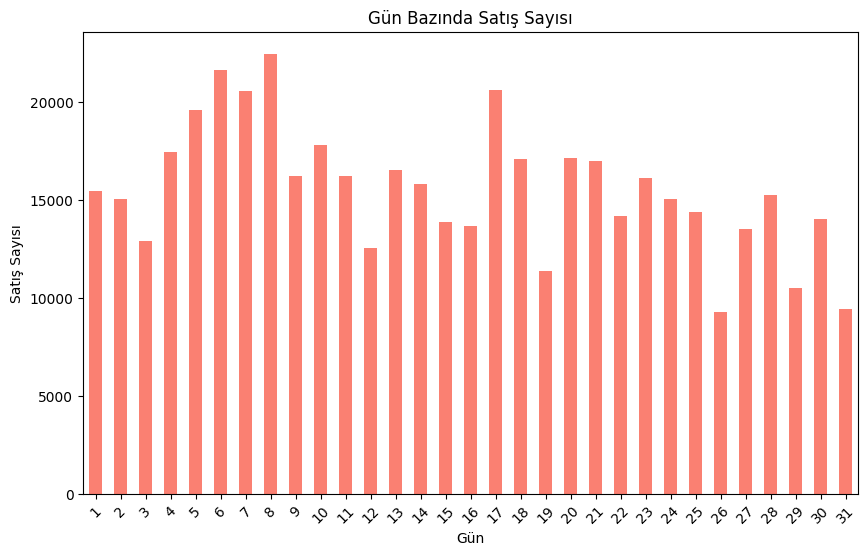

In [71]:
# Gün bazında satış sayısının görselleştirilmesi
plt.figure(figsize=(10, 6))
df_reduced.groupby('Day').size().plot(kind='bar', color='salmon')
plt.title('Gün Bazında Satış Sayısı')
plt.xlabel('Gün')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45)
plt.show()


**Saat Bazında Satış Dağılımını İnceleme**

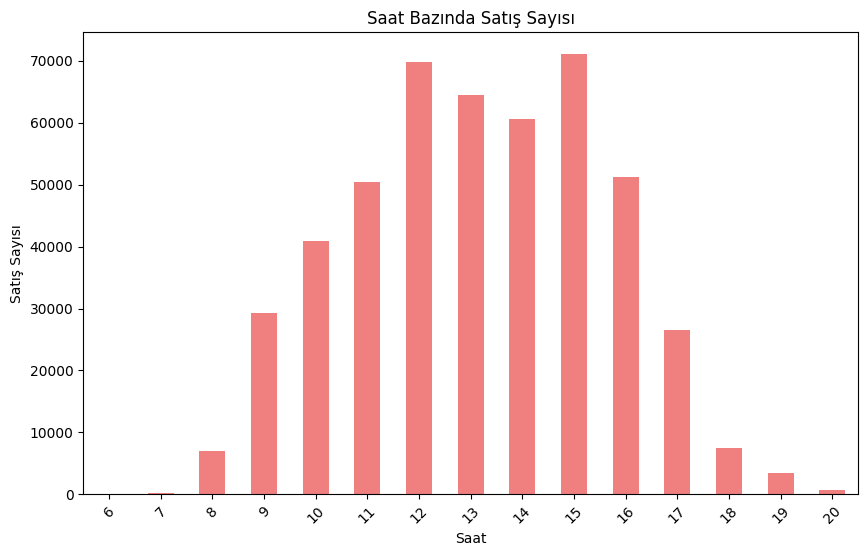

In [72]:
# Saat bazında satış sayısının görselleştirilmesi
plt.figure(figsize=(10, 6))
df_reduced.groupby('Hour').size().plot(kind='bar', color='lightcoral')
plt.title('Saat Bazında Satış Sayısı')
plt.xlabel('Saat')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45)
plt.show()


**Satışların Zamanla Değişimi**
Bir diğer önemli analiz, satışların zamanla nasıl değiştiğini gösteren bir çizgi grafik oluşturmak olabilir. Year, Month, Day ve Hour gibi sütunları birleştirerek tarihsel satış verilerini inceleyebiliriz.

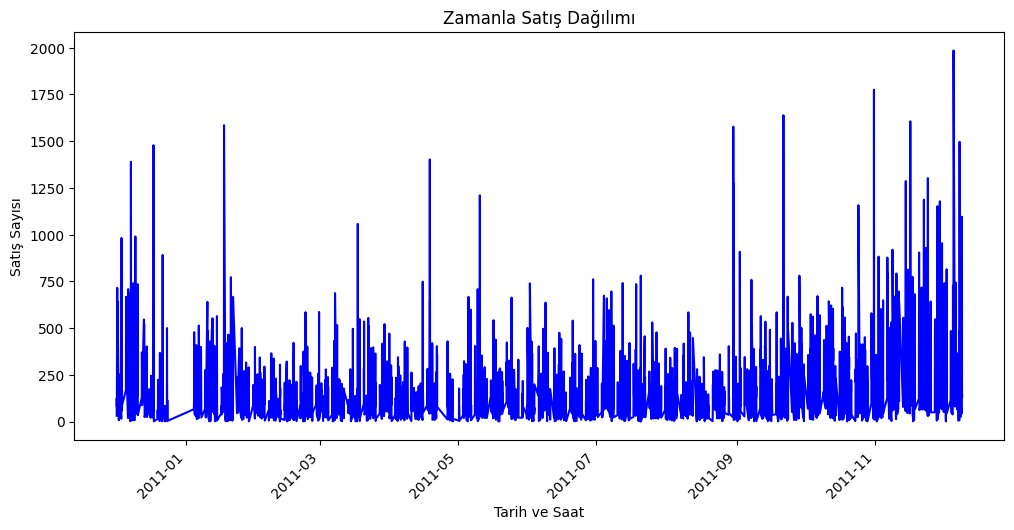

In [73]:
# Tarih ve saat bilgisi ile zaman serisi analizi
df_reduced['Date'] = pd.to_datetime(df_reduced['Year'].astype(str) + '-' + df_reduced['Month'].astype(str) + '-' + df_reduced['Day'].astype(str) + ' ' + df_reduced['Hour'].astype(str) + ':00')
df_reduced.groupby('Date').size().plot(kind='line', figsize=(12, 6), color='blue')
plt.title('Zamanla Satış Dağılımı')
plt.xlabel('Tarih ve Saat')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45)
plt.show()


In [75]:
# Yılın dönemi: Kış, Bahar, Yaz, Sonbahar
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_reduced['Season'] = df_reduced['Month'].apply(get_season)


In [76]:
# Yeni 'Season' sütununun ilk birkaç satırını görüntüleyelim
print(df_reduced[['InvoiceDate', 'Month', 'Season']].head())


          InvoiceDate  Month  Season
0 2010-12-01 08:26:00     12  Winter
1 2010-12-01 08:26:00     12  Winter
2 2010-12-01 08:26:00     12  Winter
3 2010-12-01 08:26:00     12  Winter
4 2010-12-01 08:26:00     12  Winter


**Yılın Dönemine Göre Satış Dağılımını Görselleştirme**

Season sütununu kullanarak, satışların hangi dönemde yoğunlaştığını görselleştirebilirsiniz. Aşağıda yılın dönemine göre satış sayısını gösteren bir grafik örneği bulunmaktadır:

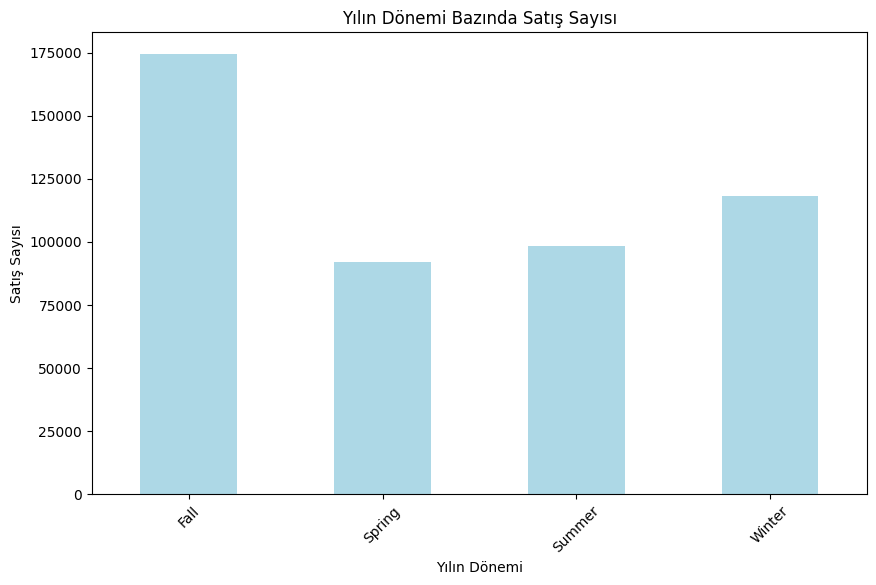

In [77]:
# Yılın dönemi (Season) bazında satış sayısının görselleştirilmesi
plt.figure(figsize=(10, 6))
df_reduced.groupby('Season').size().plot(kind='bar', color='lightblue')
plt.title('Yılın Dönemi Bazında Satış Sayısı')
plt.xlabel('Yılın Dönemi')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45)
plt.show()
